In [28]:
# импорт пакетов
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# чтение данных
df = pd.read_csv('books.csv')

# shape and data types of the data
print(df.shape)
print(df.dtypes)

# отбор числовых колонок
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

# отбор нечисловых колонок
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

(8287, 15)
Identifier                  int64
Edition Statement          object
Place of Publication       object
Date of Publication        object
Publisher                  object
Title                      object
Author                     object
Contributors               object
Corporate Author          float64
Corporate Contributors    float64
Former owner               object
Engraver                  float64
Issuance type              object
Flickr URL                 object
Shelfmarks                 object
dtype: object
['Identifier' 'Corporate Author' 'Corporate Contributors' 'Engraver']
['Edition Statement' 'Place of Publication' 'Date of Publication'
 'Publisher' 'Title' 'Author' 'Contributors' 'Former owner'
 'Issuance type' 'Flickr URL' 'Shelfmarks']


In [38]:
df.head()

,Identifier,Edition Statement,Place of Publication,Date of Publication,Publisher,Title,Author,Contributors,Corporate Author,Corporate Contributors,...,Shelfmarks,Edition Statement_ismissing,Date of Publication_ismissing,Publisher_ismissing,Author_ismissing,Corporate Author_ismissing,Corporate Contributors_ismissing,Former owner_ismissing,Engraver_ismissing,num_missing
0,206,NaN,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,"FORBES, Walter.",NaN,NaN,...,British Library HMNTS 12641.b.30.,True,False,False,False,True,True,True,True,5
1,216,NaN,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,...,British Library HMNTS 12626.cc.2.,True,False,False,False,True,True,True,True,5
2,218,NaN,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,...,British Library HMNTS 12625.dd.1.,True,False,False,False,True,True,True,True,5
3,472,NaN,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.","Appleyard, Ernest Silvanus.",NaN,NaN,...,British Library HMNTS 10369.bbb.15.,True,False,False,False,True,True,True,True,5
4,480,"A new edition, revised, etc.",London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.","BROOME, John Henry.",NaN,NaN,...,British Library HMNTS 9007.d.28.,False,False,False,False,True,True,True,True,4


Тепловая карта пропущенных данных

<AxesSubplot:>

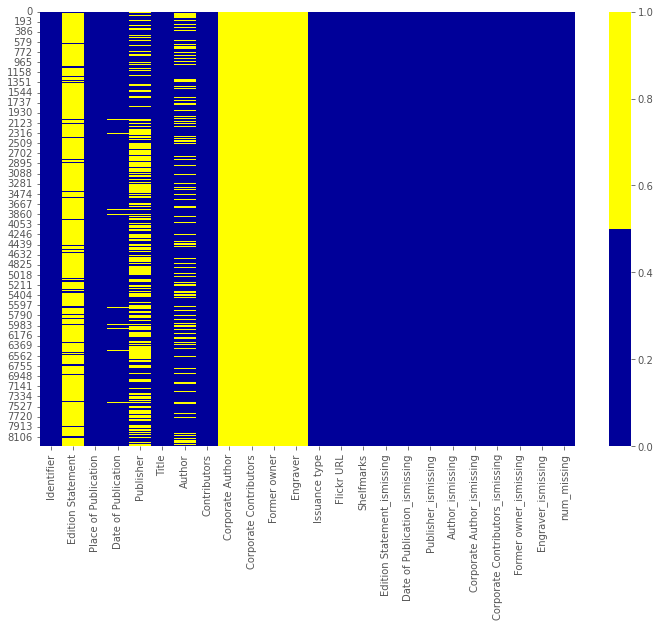

In [52]:
cols = df.columns[:30] # первые 30 колонок
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

Процентный список пропущенных данных

In [30]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Identifier - 0%
Edition Statement - 91%
Place of Publication - 0%
Date of Publication - 2%
Publisher - 51%
Title - 0%
Author - 21%
Contributors - 0%
Corporate Author - 100%
Corporate Contributors - 100%
Former owner - 100%
Engraver - 100%
Issuance type - 0%
Flickr URL - 0%
Shelfmarks - 0%


created missing indicator for: Edition Statement
created missing indicator for: Date of Publication
created missing indicator for: Publisher
created missing indicator for: Author
created missing indicator for: Corporate Author
created missing indicator for: Corporate Contributors
created missing indicator for: Former owner
created missing indicator for: Engraver


<AxesSubplot:xlabel='index'>

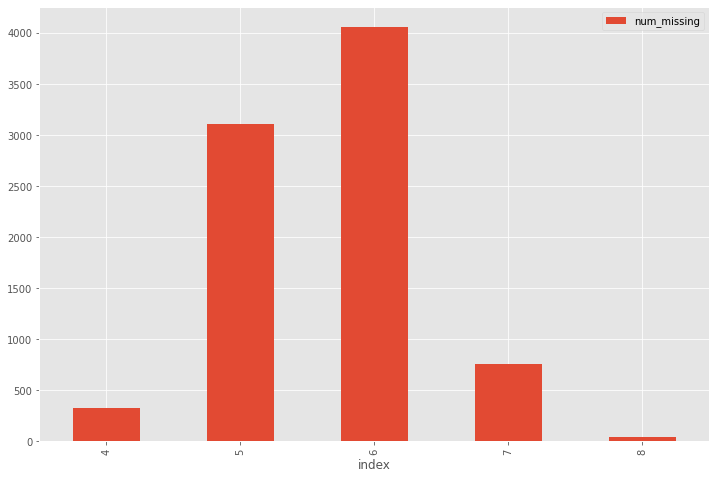

In [31]:
# индикатор для признаков с пропущенными данными
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# на основе индикатора строим гистограмму
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

# Отбрасываем строки с большим количеством пропусков

In [54]:
# отбрасываем строки с большим количеством пропусков
ind_missing = df[df['num_missing'] > 35].index
df = df.drop(ind_missing, axis=0)

<AxesSubplot:>

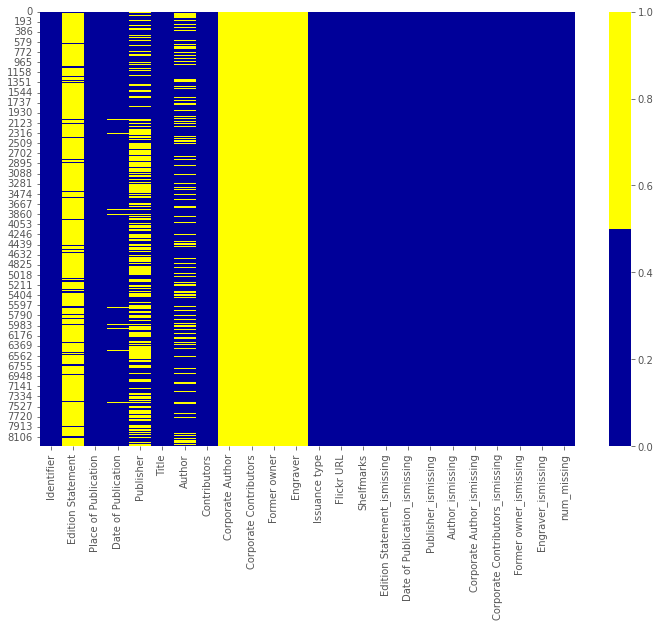

In [55]:
cols = df.columns[:30] # первые 30 колонок
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

# Удаляем столбцы с большим процентом пустых значений

In [56]:
cols_to_drop = ['Edition Statement', 'Publisher', 'Corporate Author', 'Corporate Contributors', 'Former owner', 'Engraver']
df = df.drop(cols_to_drop, axis=1)

<AxesSubplot:>

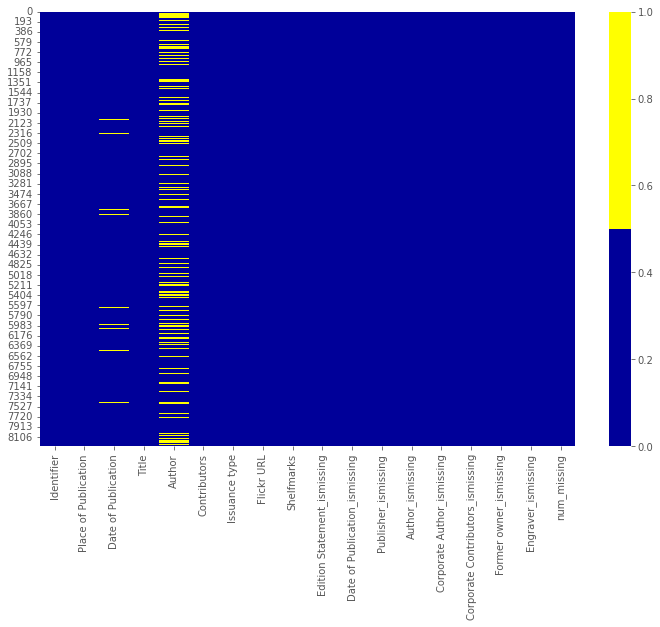

In [57]:
cols = df.columns[:30] # первые 30 колонок
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [60]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Identifier - 0%
Place of Publication - 0%
Date of Publication - 2%
Title - 0%
Author - 21%
Contributors - 0%
Issuance type - 0%
Flickr URL - 0%
Shelfmarks - 0%
Edition Statement_ismissing - 0%
Date of Publication_ismissing - 0%
Publisher_ismissing - 0%
Author_ismissing - 0%
Corporate Author_ismissing - 0%
Corporate Contributors_ismissing - 0%
Former owner_ismissing - 0%
Engraver_ismissing - 0%
num_missing - 0%


Приводим в порядок даты

In [39]:
extr = df['Date of Publication'].str.extract(r'^(\d{4})', expand=False)
extr.head()

0    1879
1    1868
2    1869
3    1851
4    1857
Name: Date of Publication, dtype: object

Ниже видим что в некоторых строчках место публикации окружено ненужной инфой

In [40]:
df['Place of Publication'].head(10)

0                                 London
1               London; Virtue & Yorston
2                                 London
3                                 London
4                                 London
5                                 London
6                                 London
7    pp. 40. G. Bryan & Co: Oxford, 1898
8                                London]
9                                 London
Name: Place of Publication, dtype: object

In [41]:
pub = df['Place of Publication']
london = pub.str.contains('London')
london[:5]

oxford = pub.str.contains('Oxford')

In [42]:
df['Place of Publication'] = np.where(london, 'London',
                                      np.where(oxford, 'Oxford',
                                               pub.str.replace('-', ' ')))
df['Place of Publication'].head()

0    London
1    London
2    London
3    London
4    London
Name: Place of Publication, dtype: object

In [61]:
df.head()

,Identifier,Place of Publication,Date of Publication,Title,Author,Contributors,Issuance type,Flickr URL,Shelfmarks,Edition Statement_ismissing,Date of Publication_ismissing,Publisher_ismissing,Author_ismissing,Corporate Author_ismissing,Corporate Contributors_ismissing,Former owner_ismissing,Engraver_ismissing,num_missing
0,206,London,1879 [1878],Walter Forbes. [A novel.] By A. A,A. A.,"FORBES, Walter.",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12641.b.30.,True,False,False,False,True,True,True,True,5
1,216,London,1868,All for Greed. [A novel. The dedication signed...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12626.cc.2.,True,False,False,False,True,True,True,True,5
2,218,London,1869,Love the Avenger. By the author of “All for Gr...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12625.dd.1.,True,False,False,False,True,True,True,True,5
3,472,London,1851,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.","Appleyard, Ernest Silvanus.",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 10369.bbb.15.,True,False,False,False,True,True,True,True,5
4,480,London,1857,"[The World in which I live, and my place in it...","A., E. S.","BROOME, John Henry.",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 9007.d.28.,False,False,False,False,True,True,True,True,4
